In [47]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from keras.models import Sequential
# from keras.layers import LSTM, Dense, GRU
# from keras.utils import np_utils
# from sklearn.model_selection import cross_val_score



# # Read the CSV file with complex numbers
# data = pd.read_csv('dataset_mp.csv')



# # Split the data into features and labels
# X = data.iloc[:, :-1].values  # Features

# y = data.iloc[:, -1].values   # Labels

# # Encode labels into numerical values
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# # Reshape the data to fit the LSTM input shape [samples, time steps, features]
# time_steps = 1  # Each sample contains one time step
# num_features = X.shape[1]
# X_train = np.reshape(X_train, (X_train.shape[0], time_steps, num_features))
# X_test = np.reshape(X_test, (X_test.shape[0], time_steps, num_features))

# # Convert labels to categorical one-hot vectors
# num_classes = len(np.unique(y))
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

# # Create the LSTM model
# model = Sequential()
# model.add(LSTM(units=128, input_shape=(time_steps, num_features)))
# model.add(Dense(units=num_classes, activation='sigmoid'))
# # model.add(Dense(units=num_classes, activation='relu'))
# # model.add(Dense(units=num_classes, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

# # Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print(f'Test loss: {loss:.4f}')
# print(f'Test accuracy: {accuracy:.4f}')

# # Save the trained model
# model.save('lstm_model1.h5')



In [48]:
# num_folds = 5
# cv_scores = cross_val_score(model, X, y, cv=num_folds)

# # Print accuracy for each fold
# for fold, accuracy in enumerate(cv_scores):
#     print(f"Fold {fold + 1}: Accuracy = {accuracy:.4f}")

# # Print mean accuracy and standard deviation
# mean_accuracy = np.mean(cv_scores)
# std_accuracy = np.std(cv_scores)
# print(f"\nMean Accuracy: {mean_accuracy:.4f}")
# print(f"Standard Deviation: {std_accuracy:.4f}")

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, Bidirectional
from keras.utils import np_utils
from sklearn.model_selection import KFold

# Read the CSV file with complex numbers
df = pd.read_csv('dataset_ALL_10+2person.csv')
# Shuffle the rows of the DataFrame
shuffled_df = df.sample(frac=1, random_state=42)

# Reset the index of the shuffled DataFrame
shuffled_df = shuffled_df.reset_index(drop=True)
data = shuffled_df

# Split the data into features and labels
X = data.iloc[:, :-1].values  # Features

y = data.iloc[:, -1].values   # Labels

# Encode labels into numerical values
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Define the number of folds for cross-validation
num_folds = 2

# Initialize lists to store accuracy values for each fold
fold_accs = []
# Create a KFold object for cross-validation
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Iterate over the folds
# for fold, (train_indices, test_indices) in enumerate(kfold.split(X)):
#     print(f"Fold {fold + 1}")
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the LSTM input shape [samples, time steps, features]
time_steps = 1  # Each sample contains one time step
num_features = X.shape[1]
X_train = np.reshape(X_train, (X_train.shape[0], time_steps, num_features))
X_test = np.reshape(X_test, (X_test.shape[0], time_steps, num_features))

# Convert labels to categorical one-hot vectors
num_classes = len(np.unique(y))
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# Create the LSTM model
model = Sequential()

# model.add(Bidirectional(GRU(units=256), input_shape=(time_steps, num_features)))
# model.add(Bidirectional(LSTM(units=256, return_sequences=True), input_shape=(time_steps, num_features)))
# model.add(Bidirectional(GRU(units=256, return_sequences=True)))
# model.add(Bidirectional(GRU(units=256, return_sequences=True)))
# model.add(Bidirectional(GRU(units=256, return_sequences=True)))
# model.add(Bidirectional(LSTM(units=256)))

#     model.add(LSTM(units=256, input_shape=(time_steps, num_features))) # if only one layer
model.add(GRU(units=256, input_shape=(time_steps, num_features), return_sequences=True))
#     model.add(LSTM(units=256, return_sequences=True))
#     model.add(LSTM(units=256, return_sequences=True))
#     model.add(LSTM(units=256, return_sequences=True))
model.add(GRU(units=256))  # Last LSTM layer, no return_sequences parameter needed

model.add(Dense(units=num_classes, activation='sigmoid'))
# model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')
#     fold_accs.append(accuracy)
    
# Print the mean and standard deviation of the accuracies
# mean_accuracy = np.mean(fold_accs)
# std_accuracy = np.std(fold_accs)
# print(f"\nMean Accuracy: {mean_accuracy:.4f}")
# print(f"Standard Deviation: {std_accuracy:.4f}")
# fold_accs.sort()
# print(f"\nMaximum accuracy: {fold_accs[-1]:.4f}")

Epoch 1/10
163/163 [==============================] - 10s 38ms/step - loss: 1.6357 - accuracy: 0.4279
Epoch 2/10
163/163 [==============================] - 6s 38ms/step - loss: 1.3209 - accuracy: 0.5488
Epoch 3/10
163/163 [==============================] - 6s 38ms/step - loss: 1.2583 - accuracy: 0.5848
Epoch 4/10
163/163 [==============================] - 6s 38ms/step - loss: 1.1940 - accuracy: 0.6108
Epoch 5/10
163/163 [==============================] - 6s 38ms/step - loss: 1.1131 - accuracy: 0.6409
Epoch 6/10
163/163 [==============================] - 6s 38ms/step - loss: 1.0542 - accuracy: 0.6764
Epoch 7/10
163/163 [==============================] - 6s 38ms/step - loss: 1.0269 - accuracy: 0.6766
Epoch 8/10
163/163 [==============================] - 6s 38ms/step - loss: 0.9772 - accuracy: 0.7020
Epoch 9/10
163/163 [==============================] - 6s 37ms/step - loss: 0.9272 - accuracy: 0.7143
Epoch 10/10
163/163 [==============================] - 6s 38ms/step - loss: 0.9125 - accur

In [50]:
# # Save the trained model
# model.save('BI_LSTM_2_SIGMOID_disTEST.h5')

41/41 [==============================] - 1s 7ms/step


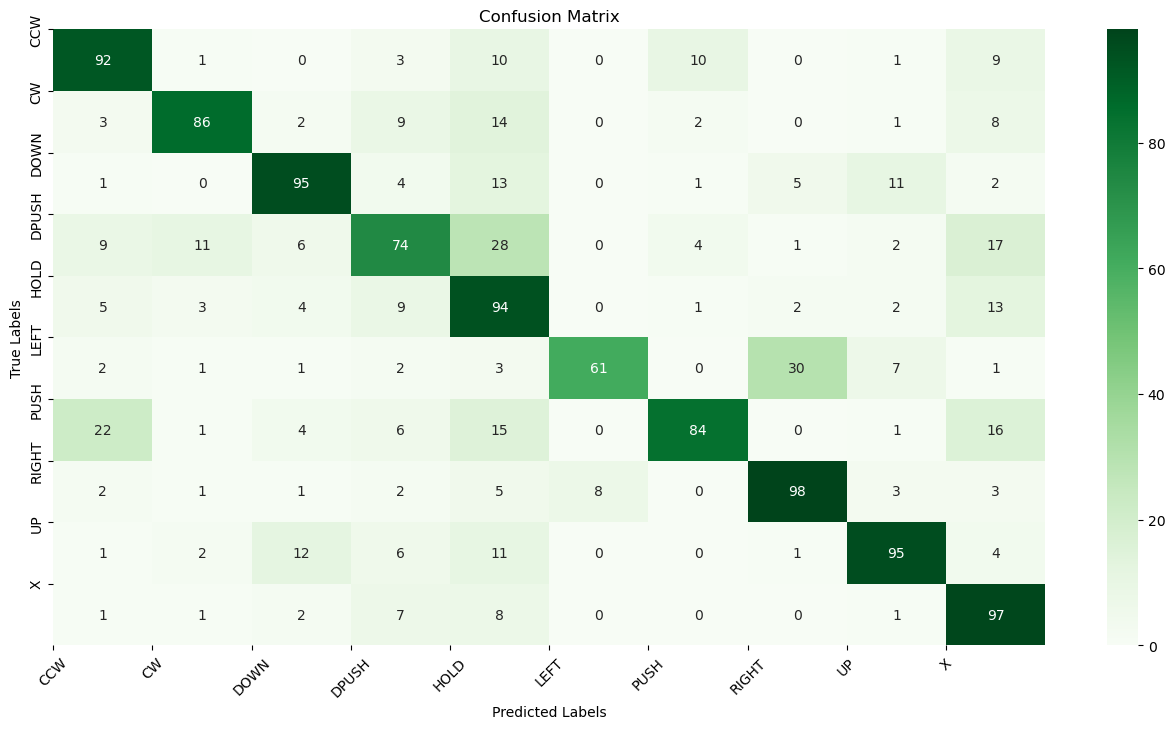

Accuracy: 0.6754


In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# X_test = X_test.values.reshape(1, 1, 12288)
y_pred_probabilities = model.predict(X_test)

# Convert predicted probabilities to class labels (0 or 1 for binary classification)
y_pred = np.argmax(y_pred_probabilities, axis=1)

y_pred1 = label_encoder.inverse_transform(y_pred)

y_true = np.argmax(y_test, axis=1)
y_true1 = label_encoder.inverse_transform(y_true)

unique_labels = np.unique(label_encoder.inverse_transform(y))
cm = confusion_matrix(y_true1, y_pred1)

plt.figure(figsize=(16, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=True)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")

plt.xticks(np.arange(len(unique_labels)), np.unique(y_pred1), rotation=45)
plt.yticks(np.arange(len(unique_labels)), np.unique(y_true1))



plt.show()
print(f"Accuracy: {accuracy:.4f}")